## Looking for the Higgs boson in 4 lepton final state, MC edition

In [54]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

file_names = {"ggH":"../data/ATLAS/higgs/mc_345060.ggH125_ZZ4lep.4lep.root",
              "Zjets":"../data/ATLAS/higgs/mc_ZeeZmumu.4lep.root", 
              "diboson":"../data/ATLAS/higgs/mc_363490.llll.VV.4lep.root", 
              "ttbar":"../data/ATLAS/higgs/mc_410000.ttbar_lep.4lep.root"}
files = {}
for fname in file_names.keys():
    files[fname] = uproot.open(file_names[fname])

In [55]:
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', 
            b'lep_phi', b'lep_E',
           b'lep_isTightID',b'lep_etcone20',
            b'lep_type',b'lep_charge']
kins = {}
for fname in file_names.keys():
    kins[fname] = {}
    for branch in branches:
        kins[fname][branch] = files[fname][tree].array(branch)

In [56]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

In [95]:
# convert everything to a more numpy friendly format
vars = {}
for fname in file_names.keys():
    vars[fname] = {}
    vars[fname][b'lep_pt']  = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_pt']]) 
    vars[fname][b'lep_phi'] = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_phi']])
    vars[fname][b'lep_eta'] = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_eta']])
    vars[fname][b'lep_E']   = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_E']])
    vars[fname][b'lep_charge']   = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_charge']])
    vars[fname][b'lep_type']   = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_type']])
    vars[fname][b'lep_isTightID']   = np.array([[x[0],x[1],x[2],x[3]] for x in kins[fname][b'lep_isTightID']])

In [58]:
GeVperMeV = 1./1000
for fname in file_names.keys():
    vars[fname][b'lep_px']     = vars[fname][b'lep_pt']*np.cos ( vars[fname][b'lep_phi']) * GeVperMeV
    vars[fname][b'lep_py']     = vars[fname][b'lep_pt']*np.sin ( vars[fname][b'lep_phi']) * GeVperMeV
    vars[fname][b'lep_pz']     = vars[fname][b'lep_pt']*np.sinh( vars[fname][b'lep_eta']) * GeVperMeV
    vars[fname][b'lep_E_GeV']  = vars[fname][b'lep_E'] * GeVperMeV

In [59]:
for fname in file_names.keys():
    vars[fname][b'higgs_px'] = np.array([ np.sum(i) for i in vars[fname][b'lep_px'] ] )
    vars[fname][b'higgs_py'] = np.array([ np.sum(i) for i in vars[fname][b'lep_py'] ] )
    vars[fname][b'higgs_pz'] = np.array([ np.sum(i) for i in vars[fname][b'lep_pz'] ] )
    vars[fname][b'higgs_E']  = np.array([ np.sum(i) for i in vars[fname][b'lep_E_GeV'] ] )

In [60]:
for fname in file_names.keys():
    vars[fname][b'higgs_pt'] = np.sqrt(vars[fname][b'higgs_px']**2+vars[fname][b'higgs_py']**2)
    vars[fname][b'higgs_p'] = np.sqrt(vars[fname][b'higgs_pt']**2+vars[fname][b'higgs_pz']**2)
    vars[fname][b'higgs_m'] = np.sqrt(vars[fname][b'higgs_E']**2 - vars[fname][b'higgs_p']**2)

In [96]:
# let's look at charge and type!
for fname in file_names.keys():
    vars[fname][b'higgs_charge'] = np.array([ np.sum(i) for i in vars[fname][b'lep_charge'] ] )
    vars[fname][b'higgs_type'] = np.array([ np.sum(i) for i in vars[fname][b'lep_type'] ] )
    vars[fname][b'higgs_tight'] = np.array([ np.sum(i) for i in vars[fname][b'lep_isTightID'] ] )


## gg $\rightarrow$ H plots

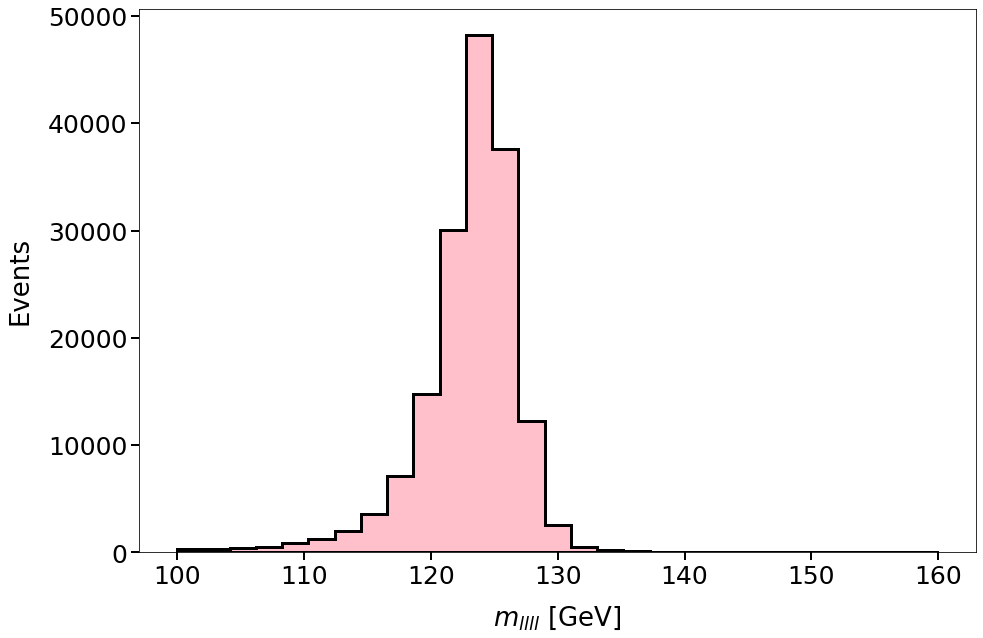

In [62]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
n, bins, patches = ax.hist(vars["ggH"][b'higgs_m'], 
                           np.linspace(100,160,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

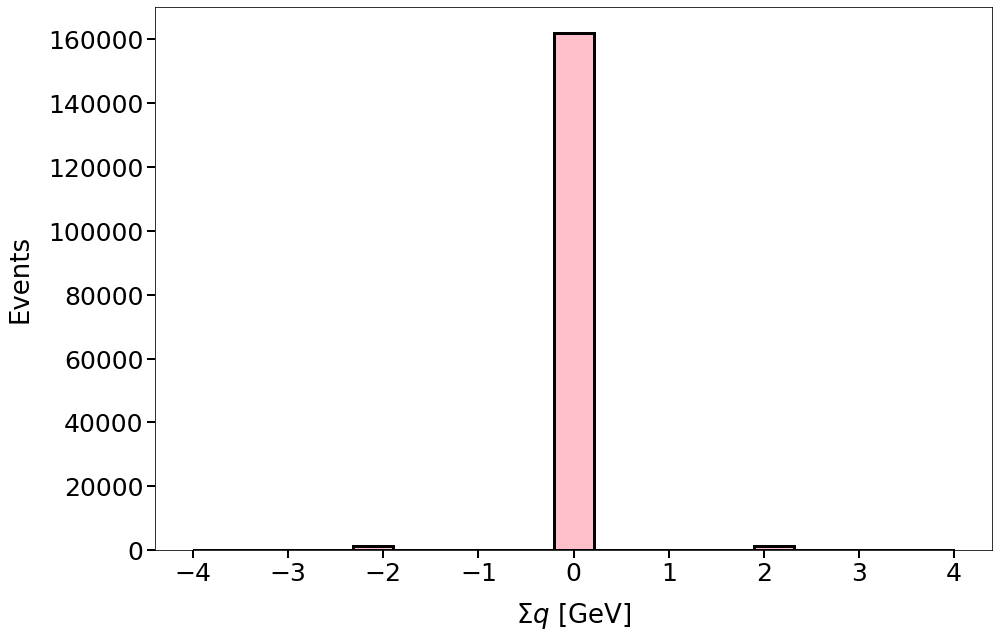

In [83]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma q$",yTitle="Events")
n, bins, patches = ax.hist(vars["ggH"][b'higgs_charge'], 
                           np.linspace(-4,4,20),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

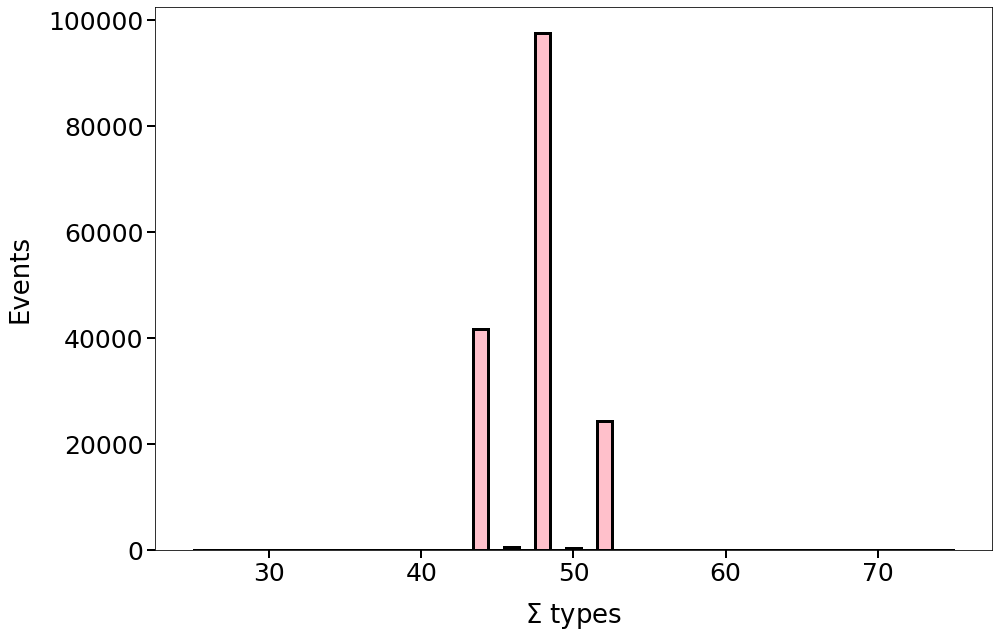

In [91]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma$ types",yTitle="Events")
n, bins, patches = ax.hist(vars["ggH"][b'higgs_type'], 
                           np.linspace(25,75,50),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

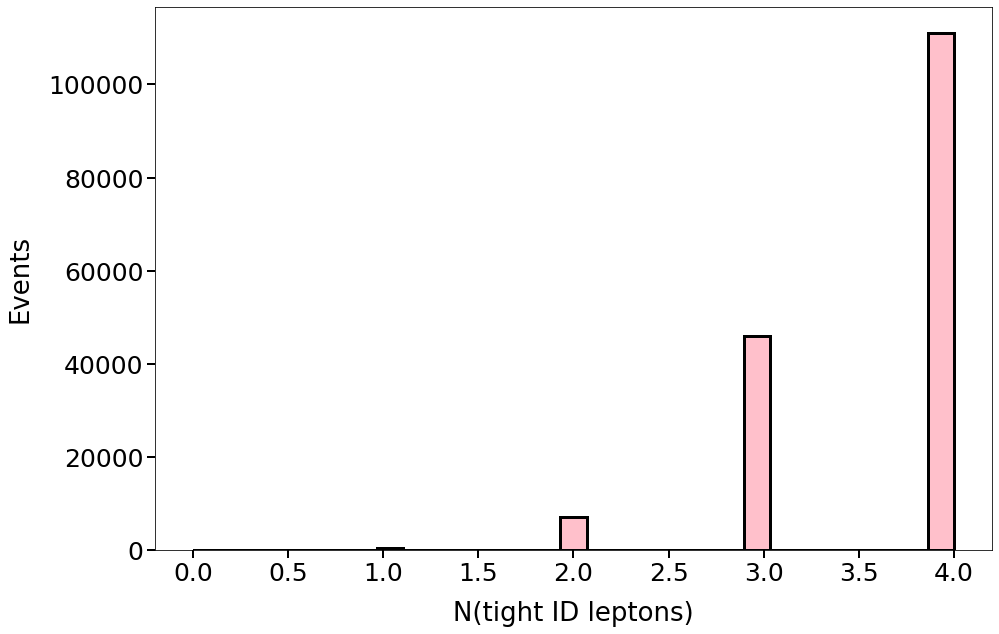

In [104]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="N(tight ID leptons)",yTitle="Events")
n, bins, patches = ax.hist(vars["ggH"][b'higgs_tight'], 
                           np.linspace(0,4,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

## Diboson

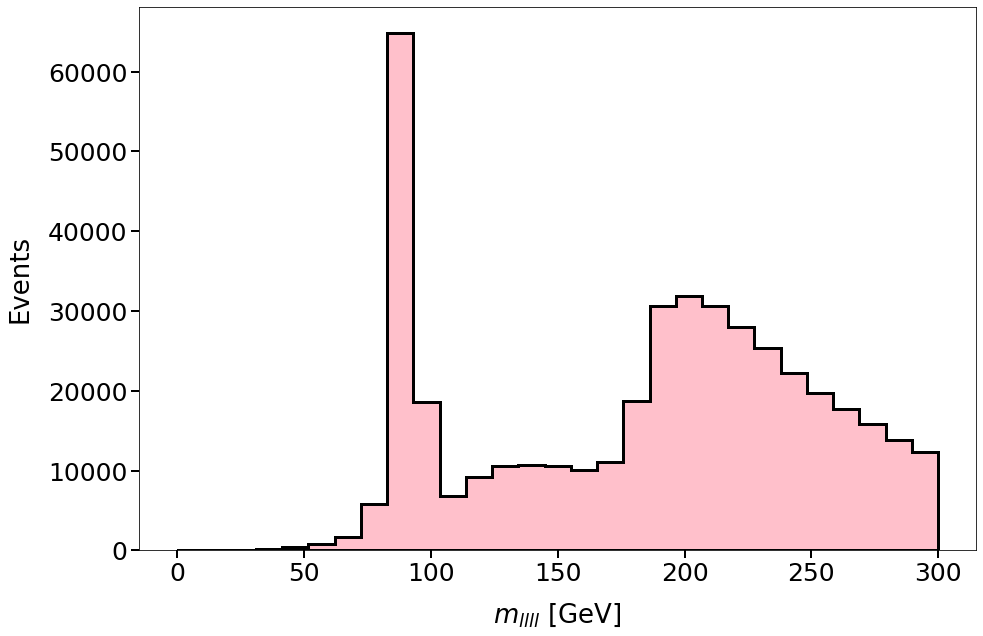

In [81]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
n, bins, patches = ax.hist(vars["diboson"][b'higgs_m'], 
                           np.linspace(0,300,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

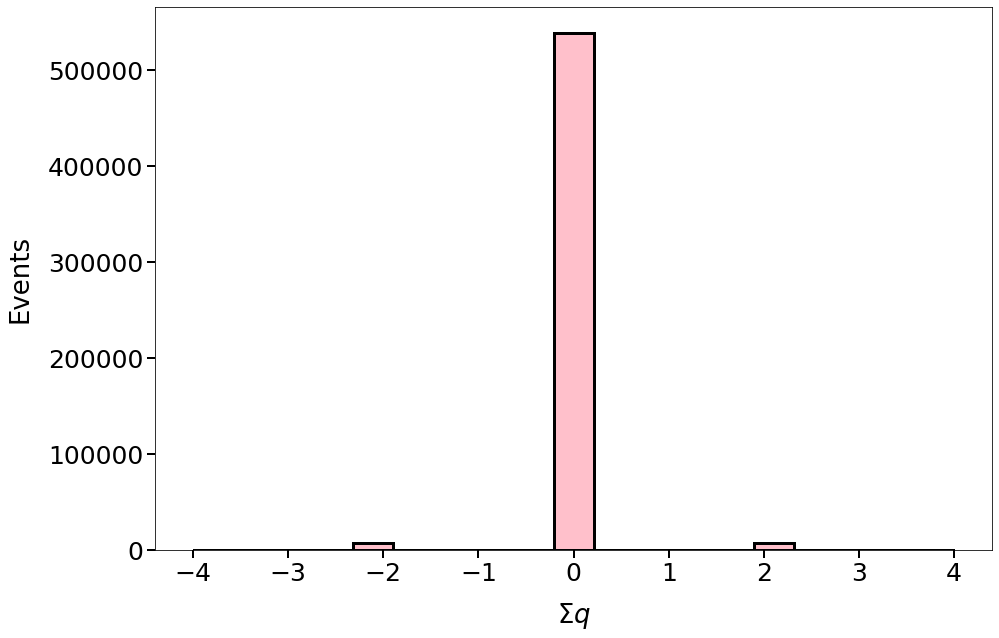

In [84]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma q$",yTitle="Events")
n, bins, patches = ax.hist(vars["diboson"][b'higgs_charge'], 
                           np.linspace(-4,4,20),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

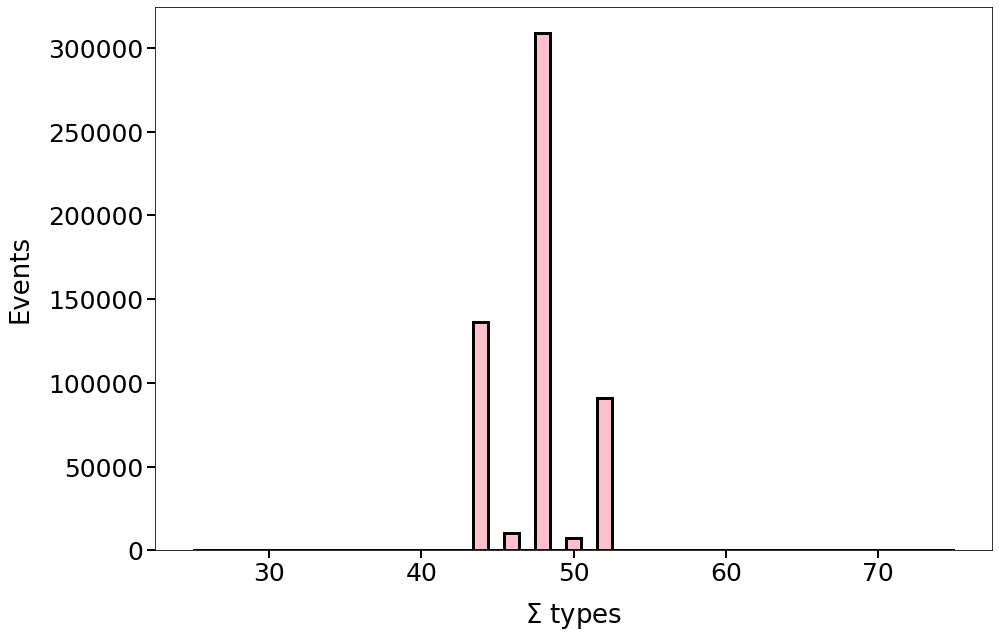

In [92]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma$ types",yTitle="Events")
n, bins, patches = ax.hist(vars["diboson"][b'higgs_type'], 
                           np.linspace(25,75,50),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

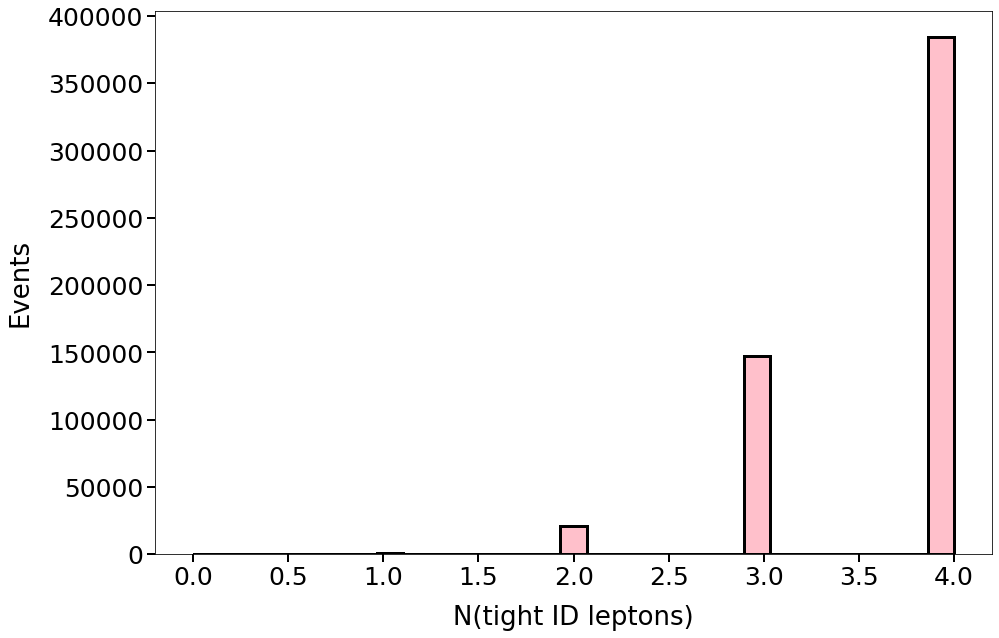

In [105]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="N(tight ID leptons)",yTitle="Events")
n, bins, patches = ax.hist(vars["diboson"][b'higgs_tight'], 
                           np.linspace(0,4,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

## $t\bar{t}$

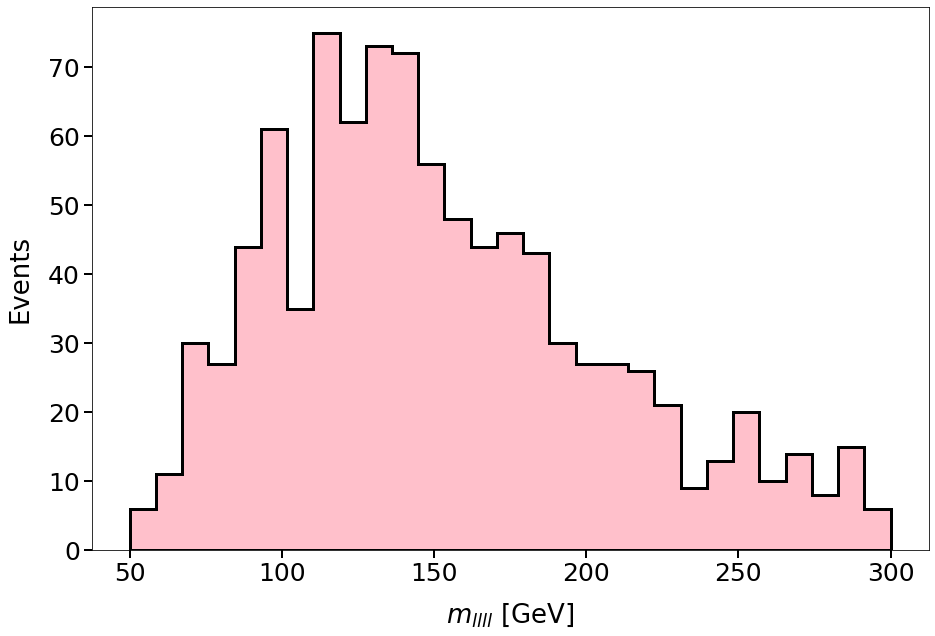

In [64]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
n, bins, patches = ax.hist(vars["ttbar"][b'higgs_m'], 
                           np.linspace(50,300,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

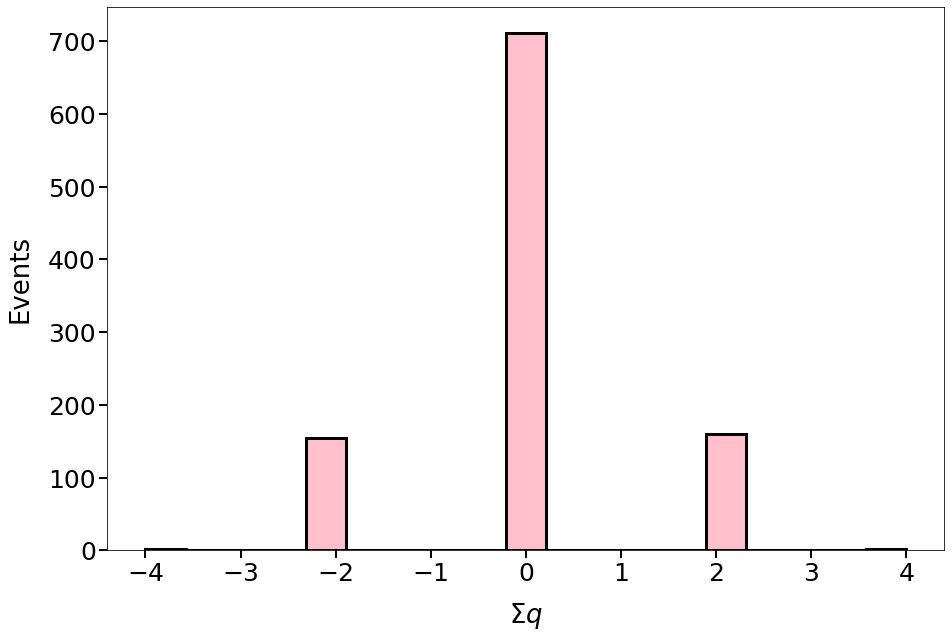

In [85]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma q$",yTitle="Events")
n, bins, patches = ax.hist(vars["ttbar"][b'higgs_charge'], 
                           np.linspace(-4,4,20),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

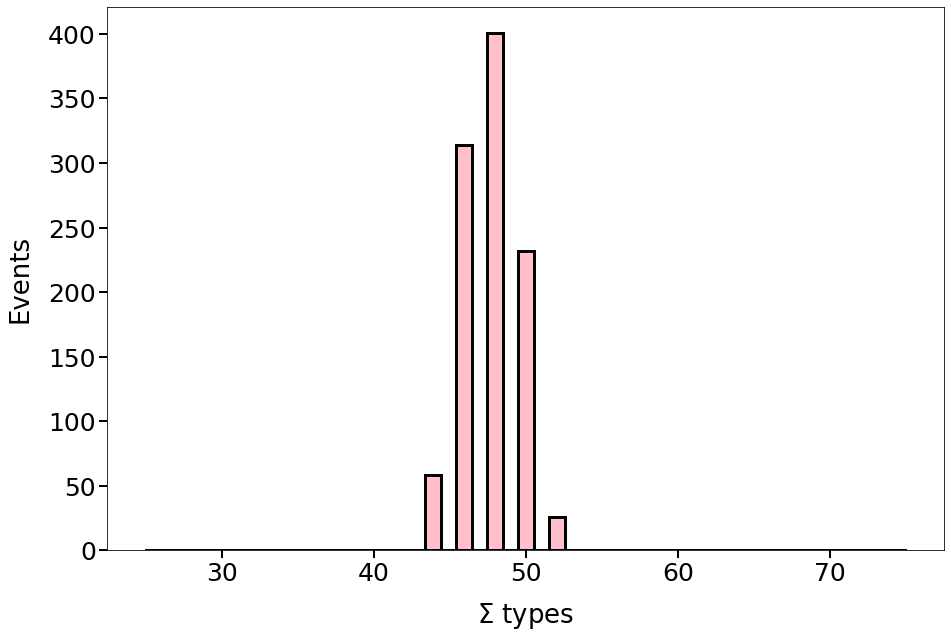

In [93]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma$ types",yTitle="Events")
n, bins, patches = ax.hist(vars["ttbar"][b'higgs_type'], 
                           np.linspace(25,75,50),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

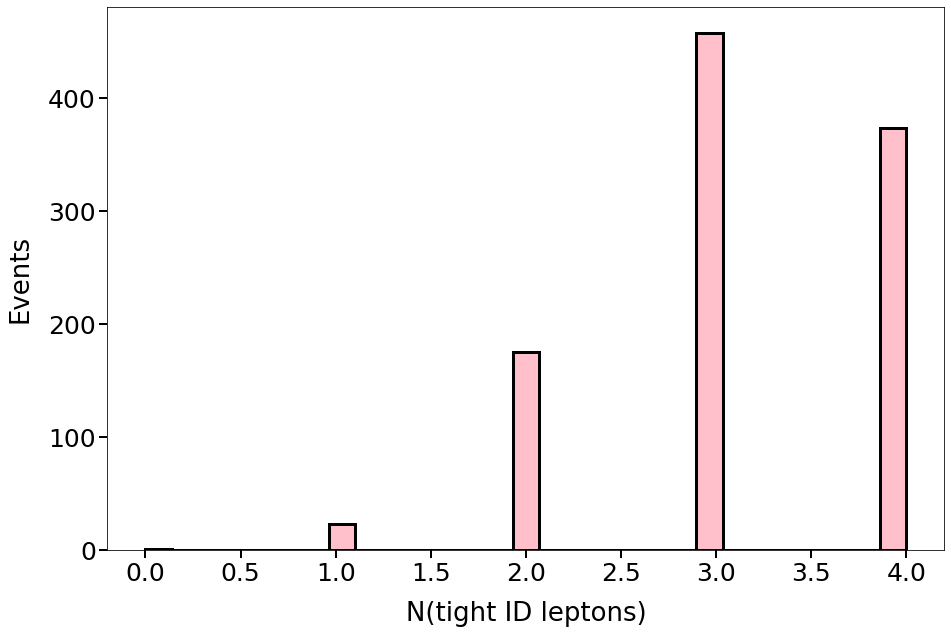

In [106]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="N(tight ID leptons)",yTitle="Events")
n, bins, patches = ax.hist(vars["ttbar"][b'higgs_tight'], 
                           np.linspace(0,4,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

In [65]:
## Z+jets

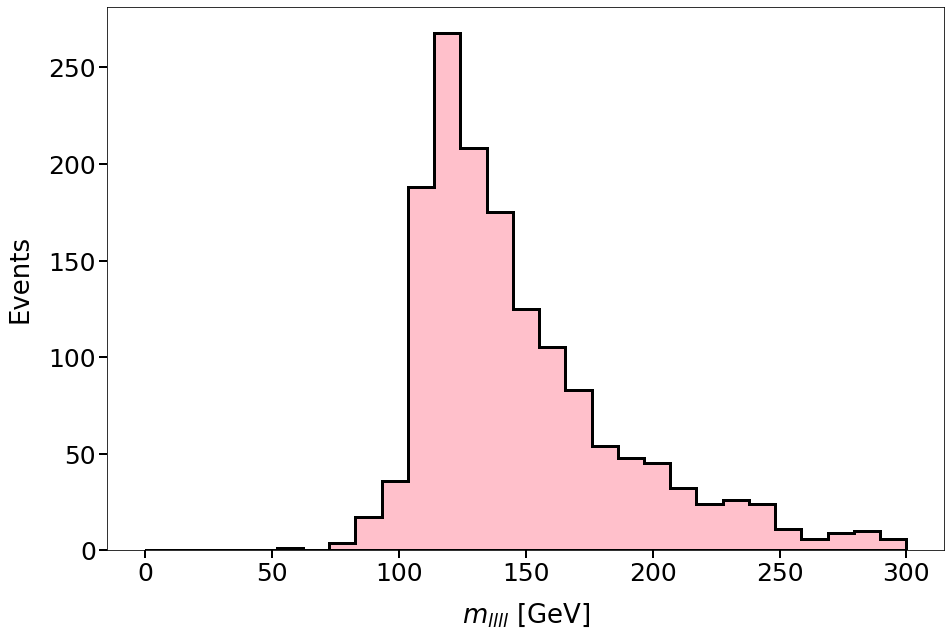

In [80]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
n, bins, patches = ax.hist(vars["Zjets"][b'higgs_m'], 
                           np.linspace(0,300,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

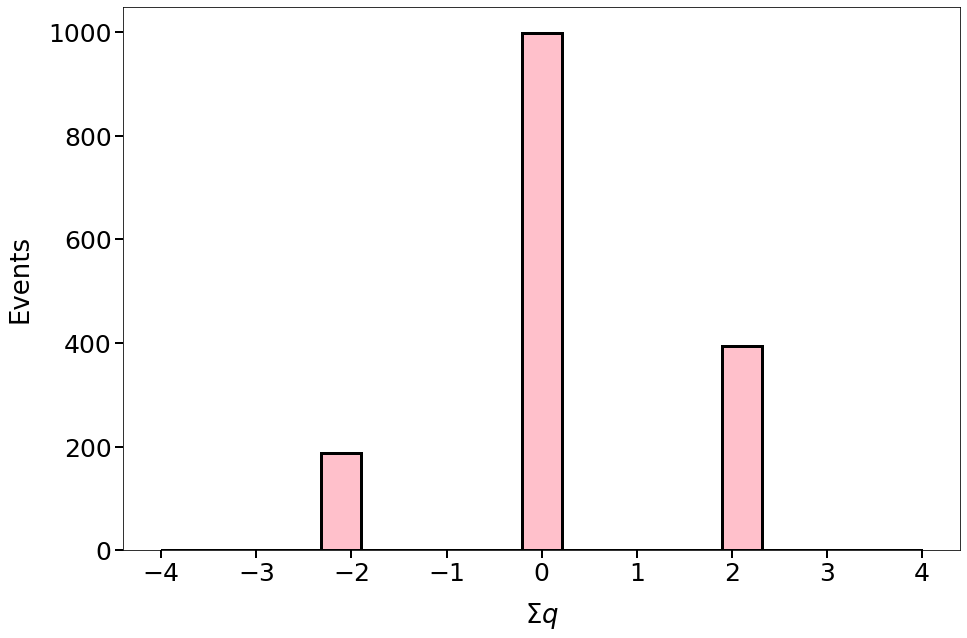

In [86]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma q$",yTitle="Events")
n, bins, patches = ax.hist(vars["Zjets"][b'higgs_charge'], 
                           np.linspace(-4,4,20),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

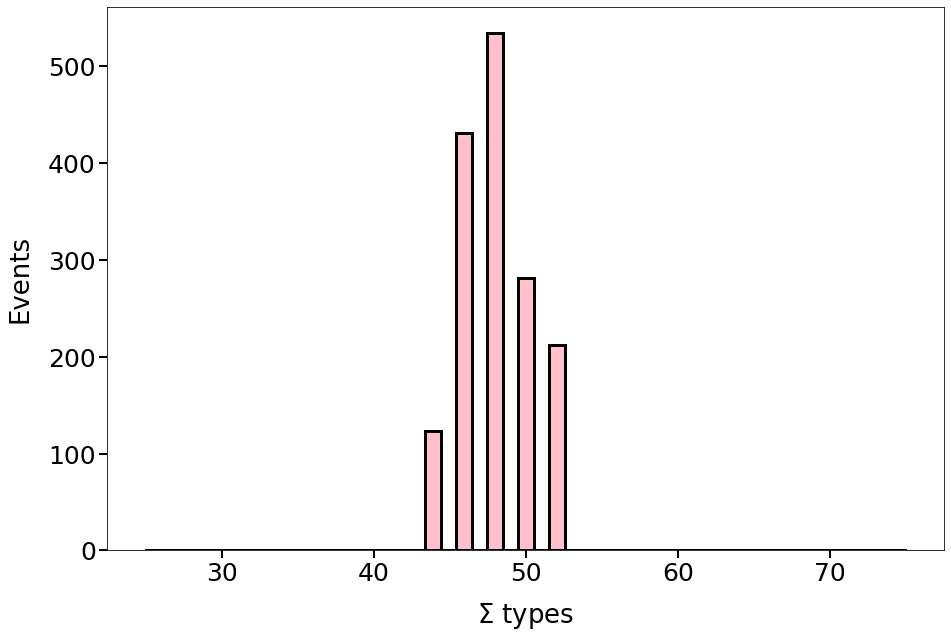

In [94]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="$\Sigma$ types",yTitle="Events")
n, bins, patches = ax.hist(vars["Zjets"][b'higgs_type'], 
                           np.linspace(25,75,50),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');

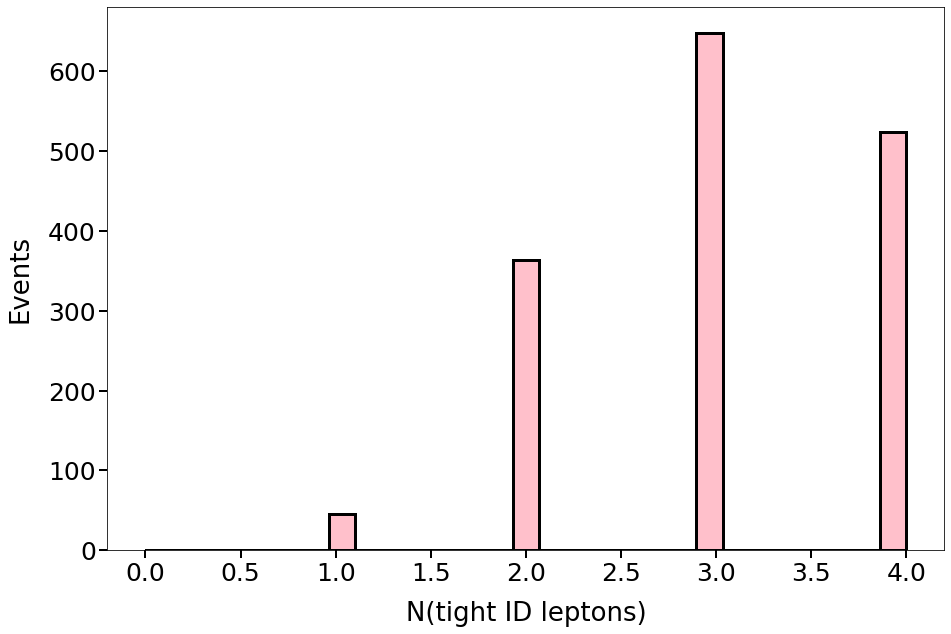

In [107]:
# Make histogram and extract bins
fig, ax = make_fig(xTitle="N(tight ID leptons)",yTitle="Events")
n, bins, patches = ax.hist(vars["Zjets"][b'higgs_tight'], 
                           np.linspace(0,4,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-');